# CAPSTONE PROJECT - THE BATTLE OF NEIGHBORHOODS
    
    
    
# Introduction & Business Problem :

New Delhi is the capital of India. It is part of the town of Delhi’s eleven districts. The city itself has a populace of 257,803. However, the large metro location has a populace that exceeds 26 million. New Delhi is used interchangeably to consult the National Capital Territory of Delhi (NCT). The official language of New Delhi and the one this is most broadly spoken is Hindi. Nevertheless, English is also spoken as a language within corporations and many agencies. Over the final decades, it is continuously growing due to the metropolis’s vital role in authorities and business. With its diverse culture, there is an diversity in the variety of food provided in New Delhi. Lots of restaurants are available which cater to different tastes of the New Delhi population.  They vary in cuisines, décor, services and ambience. Most of them can be categorized based on their cuisines such as Chinese, Italian, French, etc.

- Here we have categorized the restaurants based on Data Cluster Algorithm: 




# Questions that can be asked using the above mentioned datasets

1. What is the best location in New Delhi City for Chinese Cuisine?
2. What is the best location in New Delhi City for Cafe and Pizza?
3. Which areas have a large number of Chinese Restaurant Market?
4. Which location has the best night clubs in New Delhi City?
5. Which is the best tourist place in New Delhi City
6. Which areas have less number of the restaurant?
7. Which is the best place to stay if I prefer Chinese Cuisine?
8. What places have the best restaurants in New Delhi?


# Data

## The following data will be used for the project :

- New Delhi Restaurant data that contains list Locality, Restaurant name, Rating along with their latitude and longitude. 
    - Data source : https://www.kaggle.com/shrutimehta/zomato-restaurants-data 
- Description: This data set contains the required information. And we will use this data set to explore various locality of the new Delhi city. 
    - Data source: https://developer.foursquare.com/ 
- Description: By using this API we will get all the venues in each neighborhood.


# Approach
- Collect the new Delhi city data from https://www.kaggle.com/shrutimehta/zomatorestaurants-data 
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using an aggregative rating for each restaurant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
# ! pip install geocoder
import geocoder
print('libraries Imported')

libraries Imported


### Lets read the zomato resturant data from csv file

In [2]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [3]:
df.shape

(9551, 21)

### Lets take the data of India

In [4]:
df_india = df[df['Country Code'] == 1]
df_india.head()

Restaurant ID                        Restaurant Name  Country Code  City  \
624        3400025                             Jahanpanah             1  Agra   
625        3400341                    Rangrezz Restaurant             1  Agra   
626        3400005                Time2Eat - Mama Chicken             1  Agra   
627        3400021  Chokho Jeeman Marwari Jain Bhojanalya             1  Agra   
628        3400017                         Pinch Of Spice             1  Agra   

                                               Address     Locality  \
624  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
625  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
626        Main Market, Sadar Bazaar, Agra Cantt, Agra   Agra Cantt   
627  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...  Civil Lines   
628  23/453, Opposite Sanjay Cinema, Wazipura Road,...  Civil Lines   

      Locality Verbose  Longitude   Latitude                        Cuisines  \
624   Agra Cantt, Agra  78.011544  27.161661           North Indian, Mughlai   
625   Agra Cantt, Agra   0.000000   0.000000           North Indian, Mughlai   
626   Agra Cantt, Agra  78.011608  27.160832                    North Indian   
627  Civil Lines, Agra  77.998092  27.195928                      Rajasthani   
628  Civil Lines, Agra  78.007553  27.201725  North Indian, Chinese, Mughlai   

     ...            Currency Has Table booking Has Online delivery  \
624  ...  Indian Rupees(Rs.)                No                  No   
625  ...  Indian Rupees(Rs.)                No                  No   
626  ...  Indian Rupees(Rs.)                No                  No   
627  ...  Indian Rupees(Rs.)                No                  No   
628  ...  Indian Rupees(Rs.)                No                  No   

    Is delivering now Switch to order menu Price range  Aggregate rating  \
624                No                   No           3               3.9   
625                No                   No           2               3.5   
626                No                   No           2               3.6   
627                No                   No           2               4.0   
628                No                   No           3               4.2   

     Rating color Rating text Votes  
624        Yellow        Good   140  
625        Yellow        Good    71  
626        Yellow        Good    94  
627         Green   Very Good    87  
628         Green   Very Good   177  

[5 rows x 21 columns]

In [5]:
df_india.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Lets take the data of New Delhi 

In [6]:
df_NDLS = df_india[df_india['City'] =='New Delhi']
df_NDLS.reset_index(drop =True,inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

In [7]:
df_NDLS.shape

(5473, 21)

### Now that we have the data of New Delhi, let's start cleaning our data

remove the unwanted columns and rows from dataset

In [8]:
df_NDLS.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
df_Res = df_NDLS[df_NDLS.Longitude != 0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [10]:
df_Res = df_Res[df_Res['Aggregate rating']!= 0.0]

In [11]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

### Now we have our proper data

## Now let's create a map to show the restaurant clusters

In [12]:
New_Delhi_Rest = folium.Map(location=[28.535382,77.196923],zoom_start=15)
X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans =KMeans(n_clusters=5, random_state=0).fit(Z)
clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [13]:
pwd

'C:\\Users\\sailesh\\Data Science & Machine Learning\\Exploring the neighbourhoods in New Delhi'

In [14]:
New_Delhi_Rest.save('map.png')

In [15]:
New_Delhi_Rest.save('New Delhi Map.html')

In [16]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

## Let's see the locality with the higest rating

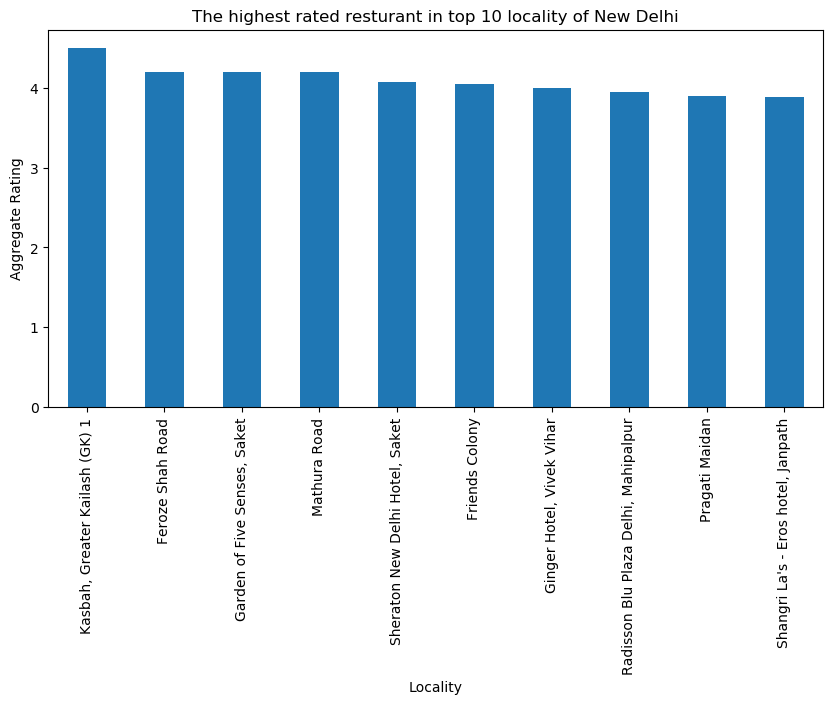

In [17]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('The highest rated resturant in top 10 locality of New Delhi')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Aggregate Rating')
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind = 'bar')
plt.show()

#### The top rated restarants are in Kasbah, Greater Kailash area.

## Let's see the locality with the lowest rating

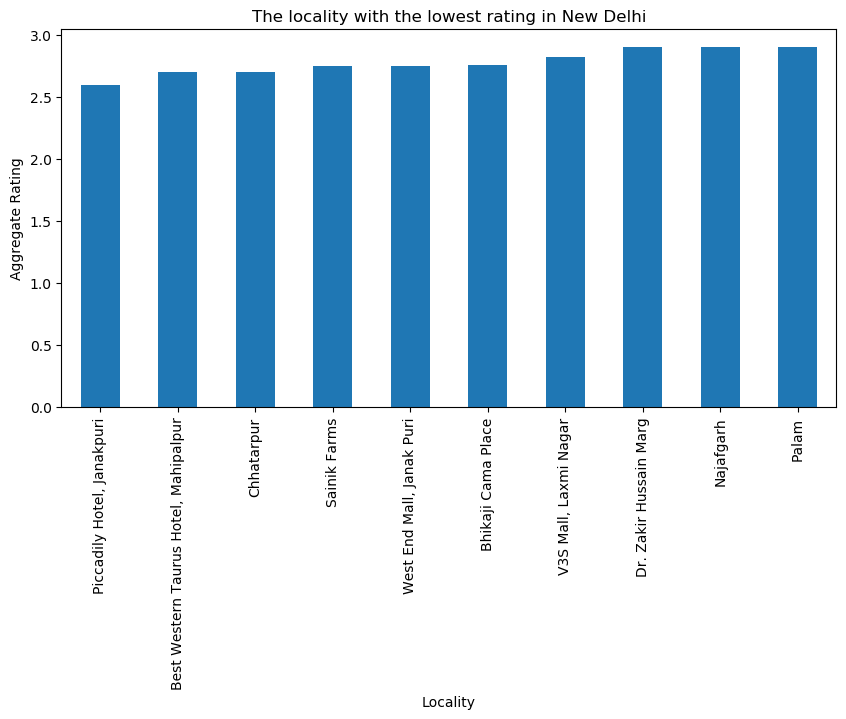

In [18]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('The locality with the lowest rating in New Delhi')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Aggregate Rating')
df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind = 'bar')
plt.show()

### The worst restarants are in Piccadily Hotel, Janakpuri.

## Let's see the highest number of restaurents in the locality of New Delhi

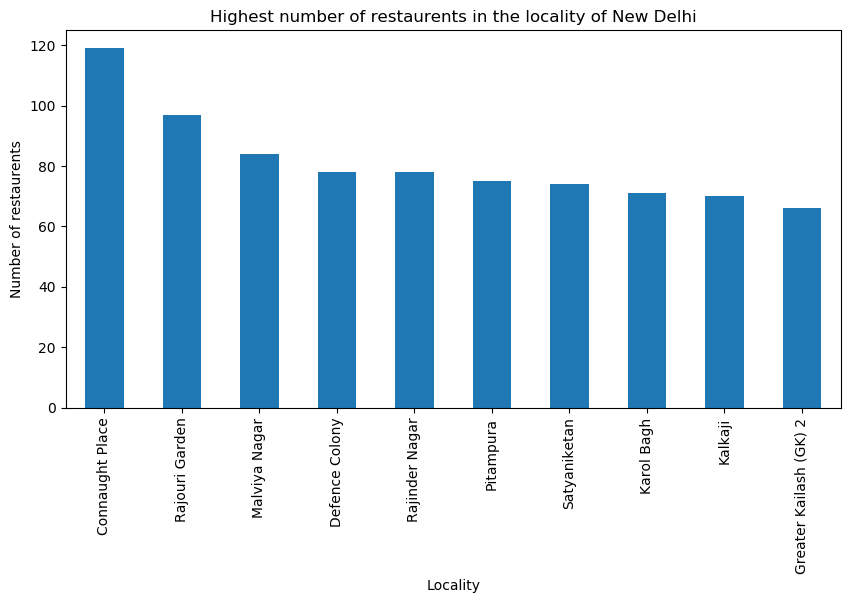

In [19]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('Highest number of restaurents in the locality of New Delhi')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Number of restaurents')
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind = 'bar')
plt.show()

## Which is the best places for chinese restaurant in New Delhi

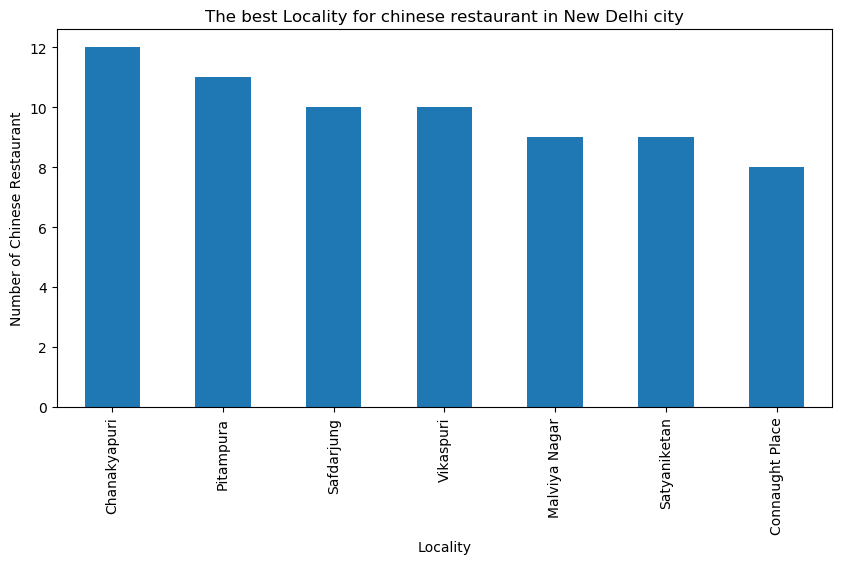

In [20]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('The best Locality for chinese restaurant in New Delhi city')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Number of Chinese Restaurant') 

df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(7).plot(kind = 'bar')

plt.show()

### Chanakyapuri is the best place for Chinese restaurant.

## Let's see which chinese restaurent has a good rating

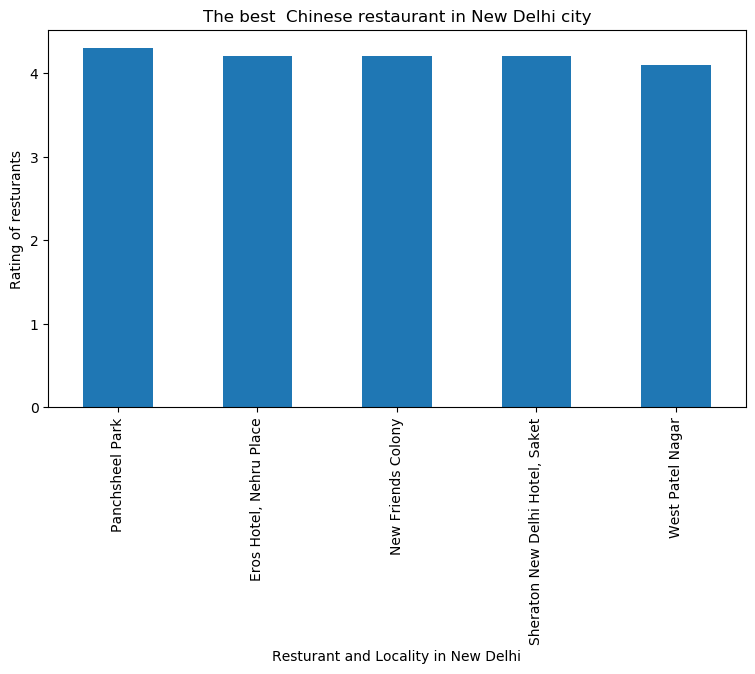

In [21]:
plt.figure(figsize=(9,5), dpi = 100)

plt.title('The best  Chinese restaurant in New Delhi city')



df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant and Locality in New Delhi')

plt.ylabel('Rating of resturants')

plt.show()


### Panchsheel park is best Chinese resturants.

## Grouping the data based on the Locality

In [22]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [23]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']

In [24]:
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [25]:
df_final.shape

(240, 8)

## Define Foursquare Credentials and Version

In [26]:
CLIENT_ID = 'K1LZA3U1MYZXQME3KWXDZMJ0GMPWLMKYJHTULRAPM4W5CI1L' # Foursquare ID 

CLIENT_SECRET = 'L1EL0ED3LXFTY5DQCJSJSBRGBEIFSUWPCYSSRQUACXQY3GIB' # Foursquare Secret
VERSION = '20200608' # Foursquare API version

## Function to get all the Locality in New Delhi

In [27]:
# Function to get all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)






### Find all the venues in New Delhi Locality

In [29]:
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )


ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [30]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1  Baljeet's Amritsari Koolcha       28.665768        77.100481   
2                    Pizza Hut       28.670321        77.103853   
3              Café Coffee Day       28.670009        77.102480   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1   Indian Restaurant  
2         Pizza Place  
3         Coffee Shop  
4  Chinese Restaurant

In [31]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         9                   9      9   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   5                   5      5   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 16                  16     16   
West Patel Nagar                                5                   5      5   
Worldmark 1, Aerocity                          30                  30     30   
Yusuf Sarai                                    13                  13     13   
ibis New Delhi, Aerocity                       30                  30     30   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      9                9   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                5                5   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              16               16   
West Patel Nagar                             5                5   
Worldmark 1, Aerocity                       30               30   
Yusuf Sarai                                 13               13   
ibis New Delhi, Aerocity                    30               30   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      9  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                5  
...                                        ...  
West Gate Mall, Rajouri Garden              16  
West Patel Nagar                             5  
Worldmark 1, Aerocity                       30  
Yusuf Sarai                                 13  
ibis New Delhi, Aerocity                    30  

[240 rows x 6 columns]

In [32]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 213 uniques categories.


In [33]:
## Analysing Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  ...  Trail  Train Station  \
0                0                 0  ...      0              0   
1                0                 0  ...      0              0   
2                0                 0  ...      0              0   
3                0                 0  ...      0              0   
4                0                 0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 214 columns]

In [34]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
235  West Gate Mall, Rajouri Garden  0.000000           0.000000   
236                West Patel Nagar  0.000000           0.000000   
237           Worldmark 1, Aerocity  0.000000           0.033333   
238                     Yusuf Sarai  0.000000           0.000000   
239        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                  0.0                 0.0      0.0                 0.0   
1                  0.0                 0.0      0.0                 0.0   
2                  0.0                 0.0      0.0                 0.0   
3                  0.0                 0.0      0.0                 0.0   
4                  0.0                 0.0      0.0                 0.0   
..                 ...                 ...      ...                 ...   
235                0.0                 0.0      0.0                 0.0   
236                0.0                 0.0      0.0                 0.0   
237                0.0                 0.0      0.0                 0.0   
238                0.0                 0.0      0.0                 0.0   
239                0.0                 0.0      0.0                 0.0   

     Airport Lounge  Airport Service  Airport Terminal  ...  Trail  \
0          0.000000              0.0          0.000000  ...    0.0   
1          0.000000              0.0          0.000000  ...    0.0   
2          0.000000              0.0          0.000000  ...    0.0   
3          0.142857              0.0          0.142857  ...    0.0   
4          0.000000              0.0          0.000000  ...    0.0   
..              ...              ...               ...  ...    ...   
235        0.000000              0.0          0.000000  ...    0.0   
236        0.000000              0.0          0.000000  ...    0.0   
237        0.000000              0.0          0.000000  ...    0.0   
238        0.000000              0.0          0.000000  ...    0.0   
239        0.000000              0.0          0.000000  ...    0.0   

     Train Station  Turkish Restaurant  Udupi Restaurant  \
0         0.000000                 0.0               0.0   
1         0.000000                 0.0               0.0   
2         0.000000                 0.0               0.0   
3         0.000000                 0.0               0.0   
4         0.000000                 0.0               0.0   
..             ...                 ...               ...   
235       0.000000                 0.0               0.0   
236       0.000000                 0.0               0.0   
237       0.033333                 0.0               0.0   
238       0.000000                 0.0               0.0   
239       0.033333                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
235                            0.0                    0.0         0.0   
236                            0.0                    0.0         0.0   
237                            0.0                    0.0         0.0   
238              

In [35]:
New_Delhi_grouped.shape

(240, 214)

In [36]:

## printing each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2              Market  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.22
1               Café  0.22
2         Restaurant  0.11
3   Parsi Restaurant  0.11
4                Pub  0.11


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1      Shopping Mall   0.2
2  Indian Restaurant   0.2
3          Multiplex   0.2
4              Hotel   0.1


----Aerocity----
                 venue  freq
0                Hotel  0.29
1     Airport Terminal  0.14
2          Coffee Shop  0.14
3  Rental Car Location  0.14
4       Airport Lounge  0.14


----Aggarwal City Mall, Pitampura----
               venue  freq
0  Indian Restaurant   0.4
1        Pizza Place   0.2
2   Department Store   0.2
3               Food   0.2
4          Nightclub   0.0


----Aggarwal City Pl

                  venue  freq
0     Indian Restaurant  0.10
1  Fast Food Restaurant  0.07
2           Coffee Shop  0.07
3                  Food  0.03
4    Frozen Yogurt Shop  0.03


----Eros Hotel, Nehru Place----
                  venue  freq
0  Fast Food Restaurant  0.11
1                 Hotel  0.07
2           Coffee Shop  0.07
3    Chinese Restaurant  0.04
4    Bengali Restaurant  0.04


----Essex Farms----
                     venue  freq
0              Event Space  0.25
1              Coffee Shop  0.25
2            Metro Station  0.25
3                Nightclub  0.25
4  North Indian Restaurant  0.00


----Feroze Shah Road----
                     venue  freq
0        Indian Restaurant   0.5
1                     Park   0.5
2                      ATM   0.0
3  New American Restaurant   0.0
4                    Motel   0.0


----Friends Colony----
              venue  freq
0             Hotel  0.33
1  Sculpture Garden  0.17
2               Gym  0.17
3      Neighborhood  0.17
4     

4  New American Restaurant  0.00


----Karol Bagh----
                  venue  freq
0     Indian Restaurant  0.25
1  Fast Food Restaurant  0.19
2            Restaurant  0.06
3                 Hotel  0.06
4          Dessert Shop  0.06


----Kasbah, Greater Kailash (GK) 1----
                venue  freq
0   Indian Restaurant  0.18
1                Café  0.18
2              Lounge  0.12
3      Clothing Store  0.06
4  Chinese Restaurant  0.06


----Kashmiri Gate----
                  venue  freq
0  Fast Food Restaurant  0.17
1           Pizza Place  0.17
2           Bus Station  0.17
3   American Restaurant  0.17
4         Metro Station  0.17


----Khan Market----
                venue  freq
0                Café  0.17
1         Coffee Shop  0.09
2    Asian Restaurant  0.07
3  Chinese Restaurant  0.07
4                 Bar  0.07


----Kirti Nagar----
               venue  freq
0                ATM  0.17
1  Electronics Store  0.17
2               Bank  0.17
3  Fish & Chips Shop  0.17
4     

                 venue  freq
0    Indian Restaurant  0.22
1          Pizza Place  0.11
2        Historic Site  0.11
3  Monument / Landmark  0.11
4   Mughlai Restaurant  0.11


----Okhla Phase 1----
            venue  freq
0  Cosmetics Shop   0.5
1     IT Services   0.5
2  Nightlife Spot   0.0
3   Movie Theater   0.0
4   Moving Target   0.0


----Okhla Phase 2----
           venue  freq
0          Hotel   1.0
1            ATM   0.0
2      Nightclub   0.0
3          Motel   0.0
4  Movie Theater   0.0


----PVR Anupam Complex----
                       venue  freq
0                       Café  0.12
1          Convenience Store  0.12
2                Pizza Place  0.12
3                  Multiplex  0.12
4  Middle Eastern Restaurant  0.12


----Pacific Mall, Tagore Garden----
                  venue  freq
0            Donut Shop   0.1
1  Fast Food Restaurant   0.1
2           Coffee Shop   0.1
3            Restaurant   0.1
4         Shopping Mall   0.1


----Paharganj----
               venu

                  venue  freq
0  Fast Food Restaurant  0.12
1        Breakfast Spot  0.12
2          Dessert Shop  0.08
3           Pizza Place  0.08
4            Donut Shop  0.08


----Star City Mall, Mayur Vihar Phase 1----
                 venue  freq
0                Hotel  0.29
1     Department Store  0.12
2           Restaurant  0.12
3               Arcade  0.06
4  American Restaurant  0.06


----Subhash Nagar----
              venue  freq
0              Park  0.25
1         Multiplex  0.25
2  Sculpture Garden  0.25
3               Gym  0.25
4               ATM  0.00


----Sunder Nagar----
                venue  freq
0   Indian Restaurant  0.23
1  Italian Restaurant  0.15
2               Hotel  0.15
3         Snack Place  0.08
4                Café  0.08


----T3 Domestic Arrival, Aerocity----
             venue  freq
0      Coffee Shop  0.21
1  Airport Service  0.14
2             Café  0.14
3              Pub  0.07
4        Rest Area  0.07


----TDI Mall, Rajouri Garden----
    

In [37]:
## making that into a pandas dataframe
## First, writing a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
## creating the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted.head()

Locality 1st Most Common Venue 2nd Most Common Venue  \
0       ARSS Mall, Paschim Vihar     Indian Restaurant                   ATM   
1                        Adchini     Indian Restaurant                  Café   
2  Aditya Mega Mall, Karkardooma     Indian Restaurant         Shopping Mall   
3                       Aerocity                 Hotel   Rental Car Location   
4  Aggarwal City Mall, Pitampura     Indian Restaurant           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place           Coffee Shop        Sandwich Place   
1            Restaurant           Coffee Shop                   Pub   
2           Pizza Place             Multiplex                 Hotel   
3  Fast Food Restaurant           Coffee Shop        Airport Lounge   
4      Department Store                  Food           Event Space   

  6th Most Common Venue           7th Most Common Venue 8th Most Common Venue  \
0    Chinese Restaurant  Multicuisine Indian Restaurant                Market   
1      Parsi Restaurant                           Hotel         Hot Dog Joint   
2                  Café                   Design Studio          Dessert Shop   
3      Airport Terminal                   Women's Store           Flea Market   
4     French Restaurant                      Food Truck            Food Court   

         9th Most Common Venue 10th Most Common Venue  
0           Falafel Restaurant             Food Court  
1  Eastern European Restaurant            Flea Market  
2                Deli / Bodega             Food Court  
3               Farmers Market      Fish & Chips Shop  
4            Food & Drink Shop            Flea Market

In [39]:

## Cluster Locality
## Running k-means to cluster the Locality into 5 clusters.

# setting number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# running k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(240,)

In [41]:
# adding clustering labels
New_Delhi_merged = df_final.head(240)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merging New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

C:\Users\sailesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               0   
1  Average, Good, Poor, Very Good         1560               4   
2                   Average, Good          434               0   
3                         Average           59               3   
4                         Average          126               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM           Pizza Place   
1     Indian Restaurant                  Café            Restaurant   
2     Indian Restaurant         Shopping Mall           Pizza Place   
3                 Hotel   Rental Car Location  Fast Food Restaurant   
4     Indian Restaurant           Pizza Place      Department Store   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Coffee Shop        Sandwich Place    Chinese Restaurant   
1           Coffee Shop                   Pub      Parsi Restaurant   
2             Multiplex                 Hotel                  Café   
3           Coffee Shop        Airport Lounge      Airport Terminal   
4                  Food           Event Space     French Restaurant   

            7th Most Common Venue 8th Most Common Venue  \
0  Multicuisine Indian Restaurant                Market   
1                           Hotel         Hot Dog Joint   
2                   Design Studio          Dessert Shop   
3                   Women's Store           Flea Market   
4                      Food Truck            Food Court   

         9th Most Common Venue 10th Most Common Venue  
0           Falafel Restaurant             Food Court  
1  Eastern European Restaurant            Flea Market  
2                Deli / Bodega             Food Court  
3               Farmers Market      Fish & Chips Shop  
4            Food & Drink Shop            Flea Market

In [42]:
# creating final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [43]:
map_clusters.save('final map.html')

## Examine Clusters


### Cluster 1


In [44]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
0    28.668945    3.100000                   Average          117   
2    28.656131    3.275000             Average, Good          434   
4    28.690020    3.033333                   Average          126   
12   28.641698    3.050000                   Average           17   
13   28.690182    3.090000       Average, Good, Poor          971   
..         ...         ...                       ...          ...   
215  28.605069    3.785714  Average, Good, Very Good         1976   
223  28.619954    2.905714             Average, Poor          242   
231  28.637492    3.062264       Average, Good, Poor         1253   
232  28.667344    3.077273       Average, Good, Poor          939   
234  28.630044    2.750000             Average, Poor          238   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                 0     Indian Restaurant                   ATM   
2                 0     Indian Restaurant         Shopping Mall   
4                 0     Indian Restaurant           Pizza Place   
12                0     Indian Restaurant         Movie Theater   
13                0           Snack Place           Pizza Place   
..              ...                   ...                   ...   
215               0     Indian Restaurant   Japanese Restaurant   
223               0                   ATM     Indian Restaurant   
231               0     Indian Restaurant        Ice Cream Shop   
232               0                   ATM             Juice Bar   
234               0     Indian Restaurant        Sandwich Place   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0             Pizza Place           Coffee Shop        Sandwich Place   
2             Pizza Place             Multiplex                 Hotel   
4        Department Store                  Food           Event Space   
12                  Hotel                Hostel      Asian Restaurant   
13                 Market             BBQ Joint          Dessert Shop   
..                    ...                   ...                   ...   
215    Chinese Restaurant            Restaurant         Jewelry Store   
223        Cosmetics Shop    Falafel Restaurant   Fried Chicken Joint   
231           Pizza Place  Fast Food Restaurant    English Restaurant   
232    Athletics & Sports     Indian Restaurant            Hotel Pool   
234    Chinese Restaurant  Fast Food Restaurant           Coffee Shop   

    6th Most Common Venue           7th Most Common Venue  \
0      Chinese Restaurant  Multicuisine Indian Restaurant   
2                    Café                   Design Studio   
4       French Restaurant                      Food Truck   
12            Event Space                      Food Truck   
13             Smoke Shop               Indian Restaurant   
..                    ...                             ...   
215        Ice Cream Shop                       Hotel Bar   
223     French Restaurant                      Food Truck   
231            Food Truck                      Food Court   
232           Event Space               French Restaurant   
234    Light Rail Station                       BBQ Joint   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                  Market    Falafel Restaurant             Food Court  
2            Dessert Shop         Deli / Bodega             Food Court  
4              Food Court     Food & Drink Shop            Flea Market  
12             Food Court     Food & Drink Shop                   Food  
13          Design Studio      Department Store    Fried Chicken Joint  
..                    ...                   ...                    ...  
215         Hot Dog Joint     Electronics Store      Food & Drink Shop  
223            Food Court     Food & Drink Shop                   Food  
231     Food & Drink Shop                  Food            Flea Market  
232            Food Truck            

### cluster 2

In [45]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
5    28.700516    3.040000       Average, Good, Poor          594   
6    28.527088    3.117391       Average, Good, Poor         1012   
7    28.541298    3.425000  Average, Good, Very Good         2460   
11   28.562580    3.750000  Average, Good, Very Good          875   
15   28.691136    3.390909  Average, Good, Very Good          485   
..         ...         ...                       ...          ...   
228  28.596073    3.052941             Average, Good          305   
233  28.695096    3.050000                   Average           86   
235  28.652978    3.500000                      Good          178   
236  28.648177    3.675000  Average, Good, Very Good          876   
238  28.559928    3.075000             Average, Good          923   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
5                 1        Ice Cream Shop  Gym / Fitness Center   
6                 1           Coffee Shop            Steakhouse   
7                 1           Coffee Shop                  Café   
11                1   Japanese Restaurant  Fast Food Restaurant   
15                1         Shopping Mall           Pizza Place   
..              ...                   ...                   ...   
228               1                   ATM    Frozen Yogurt Shop   
233               1      Department Store                  Bank   
235               1  Fast Food Restaurant                  Café   
236               1              Pharmacy           Pizza Place   
238               1     Indian Restaurant           Coffee Shop   

       3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  \
5             Sandwich Place     Fast Food Restaurant           Bus Station   
6                     Market  New American Restaurant         Women's Store   
7              Shopping Mall         Asian Restaurant  Fast Food Restaurant   
11               Karaoke Bar                   Market     Electronics Store   
15   South Indian Restaurant                   Garden           Event Space   
..                       ...                      ...                   ...   
228        French Restaurant               Food Truck            Food Court   
233            Women's Store       Falafel Restaurant   Fried Chicken Joint   
235           Cosmetics Shop      American Restaurant           Snack Place   
236      Sporting Goods Shop       Chinese Restaurant  Fast Food Restaurant   
238        Korean Restaurant           Ice Cream Shop    Chinese Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
5              Restaurant             Multiplex         Shopping Mall   
6             Event Space            Food Truck            Food Court   
7      Italian Restaurant        Clothing Store     Indian Restaurant   
11       Malay Restaurant         Women's Store    Falafel Restaurant   
15             Food Truck            Food Court     Food & Drink Shop   
..                    ...                   ...                   ...   
228     Food & Drink Shop                  Food           Flea Market   
233     French Restaurant            Food Truck            Food Court   
235             Multiplex            Shoe Store        Clothing Store   
236         Women's Store    English Restaurant            Food Court   
238  Fast Food Restaurant                   Bar      Asian Restaurant   

    9th Most Common Venue 10th Most Common Venue  
5       Electronics Store      Indian Restaurant  
6       Food & Drink Shop                   Food  
7      Chinese Restaurant         Sandwich Place  
11      French Restaurant             Food Truck  
15                   Food            Flea Market  
..                    ...                    ...  
228     Fish & Chips Shop   Fast Food Restaurant  
233     Food & Drink Shop                   Food  
235         Shopping Mall             Hookah Bar  
236     Food & Drink Shop                

### cluster 3

In [46]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating Comments  No_of_Votes  Cluster Labels  \
150  28.592401         2.9  Average           74               2   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
150                   Bar         Women's Store    Falafel Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
150   Fried Chicken Joint     French Restaurant            Food Truck   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
150            Food Court     Food & Drink Shop                  Food   

    10th Most Common Venue  
150            Flea Market

### cluster 4

In [47]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
3    28.553077    3.200000                         Average           59   
10   28.554807    3.000000                         Average            4   
19   28.548827    2.700000                         Average            9   
35   28.590297    3.350000                   Average, Good          127   
56   28.570246    4.050000              Average, Excellent         1949   
60   28.665829    4.000000                       Very Good          756   
69   28.550327    3.300000                         Average           30   
70   28.590654    3.550000                   Average, Good          302   
72   28.705700    3.350000                   Average, Good          278   
74   28.621267    3.416667                   Average, Good          475   
83   28.552895    3.300000                         Average           15   
111  28.618772    3.666667        Average, Good, Very Good          725   
112  28.552036    3.500000                            Good           26   
119  28.545033    2.960000                   Average, Good          259   
125  28.627715    3.125000                   Average, Good          171   
128  28.608252    2.945000                   Average, Good          406   
146  28.535040    3.175000                   Average, Good           60   
149  28.642910    2.996552  Average, Good, Poor, Very Good         2850   
162  28.725814    3.050000                         Average           50   
163  28.552711    3.100000                         Average            7   
169  28.667261    3.200000                         Average           76   
174  28.550802    3.250000                   Average, Good           34   
189  28.620715    3.880000        Average, Good, Very Good          626   
197  28.592724    2.985714                         Average          560   
205  28.600171    3.714286        Average, Good, Very Good         1733   
213  28.623619    3.466667                   Average, Good         1141   
217  28.535183    3.066667                         Average           37   
220  28.523519    3.700000                            Good          281   
237  28.550257    3.220000                   Average, Good           77   
239  28.551398    3.100000                         Average            9   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 3                 Hotel   Rental Car Location   
10                3                 Hotel  Gym / Fitness Center   
19                3                 Hotel       Bed & Breakfast   
35                3                 Hotel     Indian Restaurant   
56                3                 Hotel                   Gym   
60                3                 Hotel      Asian Restaurant   
69                3                 Hotel  Gym / Fitness Center   
70                3                 Hotel            Restaurant   
72                3                  Park                 Plaza   
74                3                 Hotel     Indian Restaurant   
83                3                 Hotel  Gym / Fitness Center   
111               3                 Hotel     Indian Restaurant   
112               3                 Hotel  Gym / Fitness Center   
119               3                 Hotel            Shoe Store   
125               3            Restaurant            Food Truck   
128               3                 Hotel         Women's Store   
146               3                 Hotel         Women's Store   
149               3                 Hotel     Indian Restaurant   
162               3           IT Services                 Hotel   
163               3                 Hotel  Gym / Fitness Center   
169               3                 Hotel     Indian Restaurant   
174               3                 Hotel           Coffee Shop   
189               3                 Hotel     Indian Restaurant   
197               3                 Hotel      Department Store   
205       

### cluster 5

In [48]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
1    28.537063    3.292308             Average, Good, Poor, Very Good   
8    28.555599    3.800000                         Average, Very Good   
9    28.659870    3.281481                              Average, Good   
17   28.557846    3.220000                        Average, Good, Poor   
20   28.568193    2.755556                              Average, Poor   
21   28.589797    3.085714                        Average, Good, Poor   
28   28.650254    3.166667                              Average, Good   
30   28.561898    3.100000                              Average, Good   
31   28.632091    3.779832        Average, Excellent, Good, Very Good   
44   28.574288    3.496154             Average, Good, Poor, Very Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
58   28.514237    4.200000                                  Very Good   
62   28.550319    3.701562        Average, Excellent, Good, Very Good   
63   28.535531    3.553030  Average, Excellent, Good, Poor, Very Good   
64   28.538014    3.475000                              Average, Good   
68   28.554275    3.845833        Average, Excellent, Good, Very Good   
75   28.569040    3.800000                            Good, Very Good   
78   28.597665    3.733333                   Average, Good, Very Good   
81   28.536611    3.380000                         Average, Excellent   
82   28.548371    3.137500                        Average, Good, Poor   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
88   28.626322    3.587500        Average, Excellent, Good, Very Good   
89   28.539003    3.150000                        Average, Good, Poor   
91   28.556503    3.400000                              Average, Good   
93   28.554084    3.541667                   Average, Good, Very Good   
100  28.556869    4.500000                                  Excellent   
102  28.600492    3.802326        Average, Excellent, Good, Very Good   
108  28.563827    3.800000                            Good, Very Good   
114  28.584615    3.303571             Average, Good, Poor, Very Good   
115  28.588675    3.285714                   Average, Good, Very Good   
120  28.673708    3.133333                                    Average   
121  28.702381    3.100000                                    Average   
123  28.626791    3.250000                                    Average   
127  28.619410    3.134615                        Average, Good, Poor   
129  28.523047    2.925000                                    Average   
135  28.579641    3.180000                              Average, Good   
143  28.564494    3.140625                   Average, Good, Very Good   
147  28.523307    3.430769             Average, Good, Poor, Very Good   
159  28.613748    3.900000                         Average, Excellent   
166  28.569093    3.175000             Average, Good, Poor, Very Good   
171  28.639604    3.056410             Average, Good, Poor, Very Good   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
175  28.546931    3.223077                              Average, Good   
176  28.562460    3.269231             Average, Good, Poor, Very Good   
177  28.511482    2.750000                              Average, Poor   
179  28.572117    3.871429                   Average, Good, Very Good   
180  28.534499    3.000000                        Average, Good, Poor   
182  28.587918    3.541892  Average, Excellent, Good, Poor, Very Good   
190  28.577107    3.100000                                    Average   
191  28.522279    3.100000                                    Average   
200  28.564288    3.200000                                    Average   
203  28.601187    3.633333                              Average, Good   
207  28.625445    3.600000                   Average, Good, Very Good   
208  28.562469    2.971429                        Average, Good, Poor


# Conclusion

- Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.
- Panchsheel Park, Nehru place have the best Chinese Restaurant.
- Connaught Place, Rajouri Garden, Malviya Nagar are the best places for an edible person.
- Greater Kailash, Firozeshah Rd, Saket have the best restaurants in New Delhi.  
#### Cluster 1: It is most recommended for Indian Restaurants.
#### Cluster 2: It is most recommended for Hotels and nightclub.
#### Cluster 3 and Cluster 5: It is most recommended for Fast food. 
#### Cluster 4: It is most recommended for the cafe and pizza.